# Predicting Credit Card Default

by Bima Putra Pratama

---

## 1. Introduction

### Backgrounds


### Goals
This projects aim to create a model that are able to predict the customer credit card default. 

## 2. Dataset 
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. This dataset can be downloaded from this [link](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset).

There are 25 variables in this dataset with detail as below:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)

## 3. Methodology

There are main steps in the process to create a model that can be used to predict our target values:
1. Data Preparation
2. Exploratory Data Analysis
3. Modeling
4. Model Evaluation and Selection

### Data Preparation

In [198]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Linear Models, their CV and Statsmods
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC

# Classifier Metrics 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score

# Pre-processing packages
from sklearn.preprocessing import StandardScaler

# CV, Gridsearch, train_test_split, model selection packages
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

# Boosting Algorithm
import gc
from datetime import datetime 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost as xgb

import time
import pickle

%matplotlib inline
pd.set_option('display.max_columns', None)

In [50]:
# Import Dataset
df = pd.read_csv('/content/drive/My Drive/Dataset/UCI_Credit_Card.csv')
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


There are two column name that I decided to change. So it can be more consistent and easy to understand:
- PAY_0 = PAY_1
- default.payment.next.month = default_pay

In addition I also will make ID as our index data frame

In [217]:
# Rename columns
df = df.rename(columns={"PAY_0":"PAY_1",
                        "default.payment.next.month":"DEFAULT_PAY"})

# Set ID as index
df.set_index('ID',inplace=True)

# Checking New Column
print(df.columns)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULT_PAY'],
      dtype='object')


Generate data summary to get more understanding about the data.

In [224]:
# Create a data summary

def data_summaries(df, pred=None):
    """ 
    This function used to print summary of the data
    
    Args:
    df = dataframe that will be describes
    pred = Target column tha will be predict
    
    Output:
    Dataset summaries

    """
    obs = df.shape[0]
    types = df.dtypes
    row_counts = df.count()
    uniques = df.nunique()
    missing_values = df.isna().sum()
    missing_ratio = (df.isna().sum()/ obs) * 100
    distinct_values = df.apply(lambda x: [x.unique()])
    skewness = df.skew()
    stat = df.describe().round(2).T
    
    print ("DATA SUMMARIES")
    print ("\n----- Data Shape -----\n")
    print('Total Rows:', df.shape[0])
    print('Total Columns:', df.shape[1])
    print('Duplicate Records:', df.index.duplicated().sum())
    
    overview_cols = ['types', 'counts', 'distincts', 'missing count',
                     'missing ratio', 'distinct values']
    overview = pd.concat([types, row_counts, uniques, missing_values,
                          missing_ratio, distinct_values], axis = 1)
    overview.columns = overview_cols
    
    if pred is None:
        stat_cols = ['mean', 'std', 'min', '25%', '50%', '75%', 'max',
                     'skewness']
        data_stat = pd.concat([stat['mean'], stat['std'], stat['min'],
                               stat['25%'], stat['50%'], stat['75%'],
                               stat['max'],skewness],
                               axis = 1,
                               join = 'inner')

    else:
        corr = df.corr()[pred]
        data_stat = pd.concat([stat['mean'], stat['std'], stat['min'],
                               stat['25%'], stat['50%'], stat['75%'],
                               stat['max'],skewness, corr],
                               axis = 1, join = 'inner')
        corr_col = 'corr '  + pred
        stat_cols = ['mean', 'std', 'min', '25%', '50%', '75%', 'max',
                     'skewness',  corr_col ]
    
    data_stat.columns = stat_cols
    
    print('\n----- Data Overview -----\n')
    display(overview)
    print('\n----- Descriptive Statistics -----\n')
    
    return data_stat


data_summaries(df,pred='DEFAULT_PAY')

DATA SUMMARIES

----- Data Shape -----

Total Rows: 30000
Total Columns: 24
Duplicate Records: 0

----- Data Overview -----



,types,counts,distincts,missing count,missing ratio,distinct values
LIMIT_BAL,float64,30000,81,0,0.0,"[[20000.0, 120000.0, 90000.0, 50000.0, 500000...."
SEX,int64,30000,2,0,0.0,"[[2.0, 1.0]]"
EDUCATION,int64,30000,4,0,0.0,"[[2.0, 1.0, 3.0, 4.0]]"
MARRIAGE,int64,30000,3,0,0.0,"[[1.0, 2.0, 3.0]]"
AGE,int64,30000,56,0,0.0,"[[24.0, 26.0, 34.0, 37.0, 57.0, 29.0, 23.0, 28..."
PAY_1,int64,30000,11,0,0.0,"[[2.0, -1.0, 0.0, -2.0, 1.0, 3.0, 4.0, 8.0, 7...."
PAY_2,int64,30000,11,0,0.0,"[[2.0, 0.0, -1.0, -2.0, 3.0, 5.0, 7.0, 4.0, 1...."
PAY_3,int64,30000,11,0,0.0,"[[-1.0, 0.0, 2.0, -2.0, 3.0, 4.0, 6.0, 7.0, 1...."
PAY_4,int64,30000,11,0,0.0,"[[-1.0, 0.0, -2.0, 2.0, 3.0, 4.0, 5.0, 7.0, 6...."
PAY_5,int64,30000,10,0,0.0,"[[-2.0, 0.0, -1.0, 2.0, 3.0, 5.0, 4.0, 7.0, 8...."



----- Descriptive Statistics -----



,mean,std,min,25%,50%,75%,max,skewness,corr DEFAULT_PAY
LIMIT_BAL,167484.32,129747.66,10000.0,50000.00,140000.0,240000.00,1000000.0,0.992867,-0.153520
SEX,1.60,0.49,1.0,1.00,2.0,2.00,2.0,-0.424183,-0.039961
EDUCATION,1.84,0.74,1.0,1.00,2.0,2.00,4.0,0.489720,0.033842
MARRIAGE,1.56,0.52,1.0,1.00,2.0,2.00,3.0,0.036154,-0.027575
AGE,35.49,9.22,21.0,28.00,34.0,41.00,79.0,0.732246,0.013890
PAY_1,-0.02,1.12,-2.0,-1.00,0.0,0.00,8.0,0.731975,0.324794
PAY_2,-0.13,1.20,-2.0,-1.00,0.0,0.00,8.0,0.790565,0.263551
PAY_3,-0.17,1.20,-2.0,-1.00,0.0,0.00,8.0,0.840682,0.235253
PAY_4,-0.22,1.17,-2.0,-1.00,0.0,0.00,8.0,0.999629,0.216614
PAY_5,-0.27,1.13,-2.0,-1.00,0.0,0.00,8.0,1.008197,0.204149


By examining the data sumary we can conclude that this dataset:
- Have 30,000 unique card records 
- Doesn't have missing values
- There are a values that not mentioned in description of dataset for MARRIAGE and EDUCATION. Those has values = 0.0. So, I decided to change the data values to other categories in both features in the next step. In addition I also will add 5,6 in marriage to others as well.
- There are no features that strongly correlated (corr > 0.7) to our target variables

In [225]:
# Remapping Marriage
df.loc[(df['MARRIAGE'] == 0.0),'MARRIAGE'] = 3

# Remapping Education
df.loc[((df['EDUCATION'] == 0.0) | (df['EDUCATION'] > 4)),'EDUCATION'] = 4

# Checking Remaping Values
print(df['MARRIAGE'].unique())
print(df['EDUCATION'].unique())

[1 2 3]
[2 1 3 4]


Now that we have done preparing our dataset and this dataset is ready to use for the next process.

### Data Exploration

First I will check the distribution of our target variables

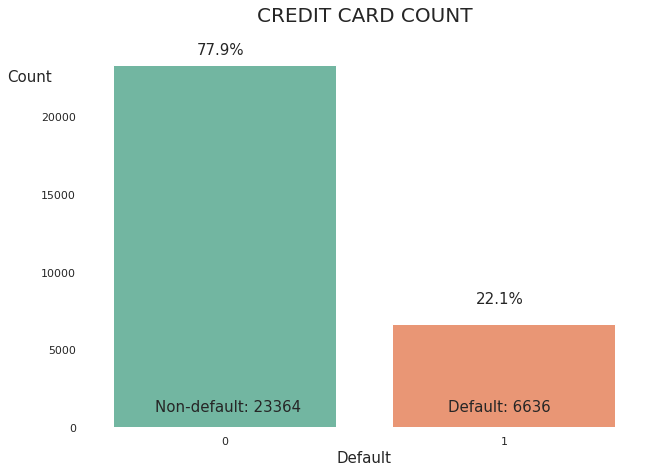

In [226]:
# Frequency of the defaults
default = df['DEFAULT_PAY'].sum() # adds up all the default cases in the df
no_default = len(df['DEFAULT_PAY']) - default  # entire dataset - default cases

# Percentage of the defaults
default_perc = round(default/len(df['DEFAULT_PAY']) * 100, 1)
no_default_perc = round(no_default/len(df['DEFAULT_PAY']) * 100, 1)

# Preparing Plot
fig, ax = plt.subplots(figsize=(10,7))  # Sets size of graph

sns.countplot('DEFAULT_PAY',data=df, palette="Set2")   
plt.annotate('Non-default: {}'.format(no_default), 
             xy=(-0.25, 1000), # xy = (x dist from 0, y dist from 0)
             size=15)

plt.annotate('Default: {}'.format(default), 
             xy=(0.8, 1000), # xy = (x dist from 0, y dist from 0)
             size=15)

plt.annotate('{}%'.format(no_default_perc), xy=(-0.1, 24000),size=15)
plt.annotate('{}%'.format(default_perc), xy=(0.9, 8000),size=15)
plt.title('CREDIT CARD COUNT', size=20, pad=25)
plt.xlabel("Default",size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=10, # Adjusts distance of the title from the graph
           size=15)
ax.yaxis.set_label_coords(-0.1,.9)

plt.box(False)        # Removes the bounding area

From above chart we know that 6,636 out of 30,000 (or 22%) of clients will default next month. This data shows that we have imbalance data between Defaulter and Non-Defaulter. Thus we will take this into account. I will take this into account and will be deal with several ways:
- Oversample the Dataset
- SMOTE the Dataset
- Undersample the Dataset
- Leave as it is

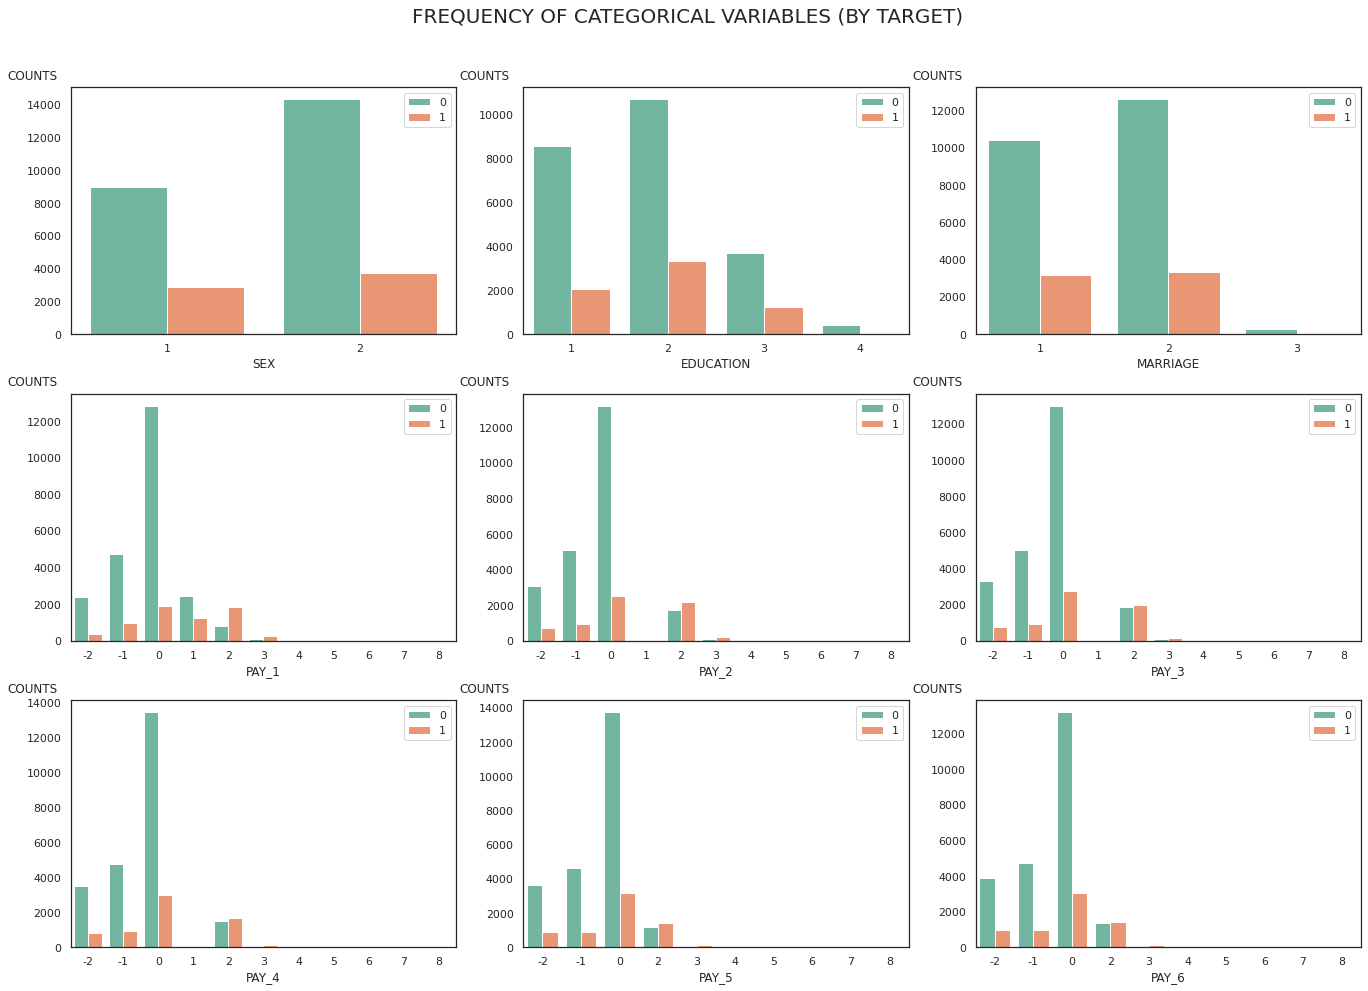

In [227]:
# Exploring Categorical Variables

# Creating a new dataframe with just the categorical explanatory variables
df_categorical = df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
                     ,'DEFAULT_PAY']]

f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)",size=20)

# Creating plots of each categorical variable to target 
i = 0
for x in range(1,4):
  for y in range(1,4):
    g = sns.countplot(x=df_categorical.columns[i], hue = 'DEFAULT_PAY', data=df_categorical, palette='Set2', ax = axes[x-1,y-1])
    g.legend(loc="upper right")
    g.set_ylabel('COUNTS', rotation=0, labelpad=40)
    g.yaxis.set_label_coords(-0.1,1.02)
    i = i+1 

# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

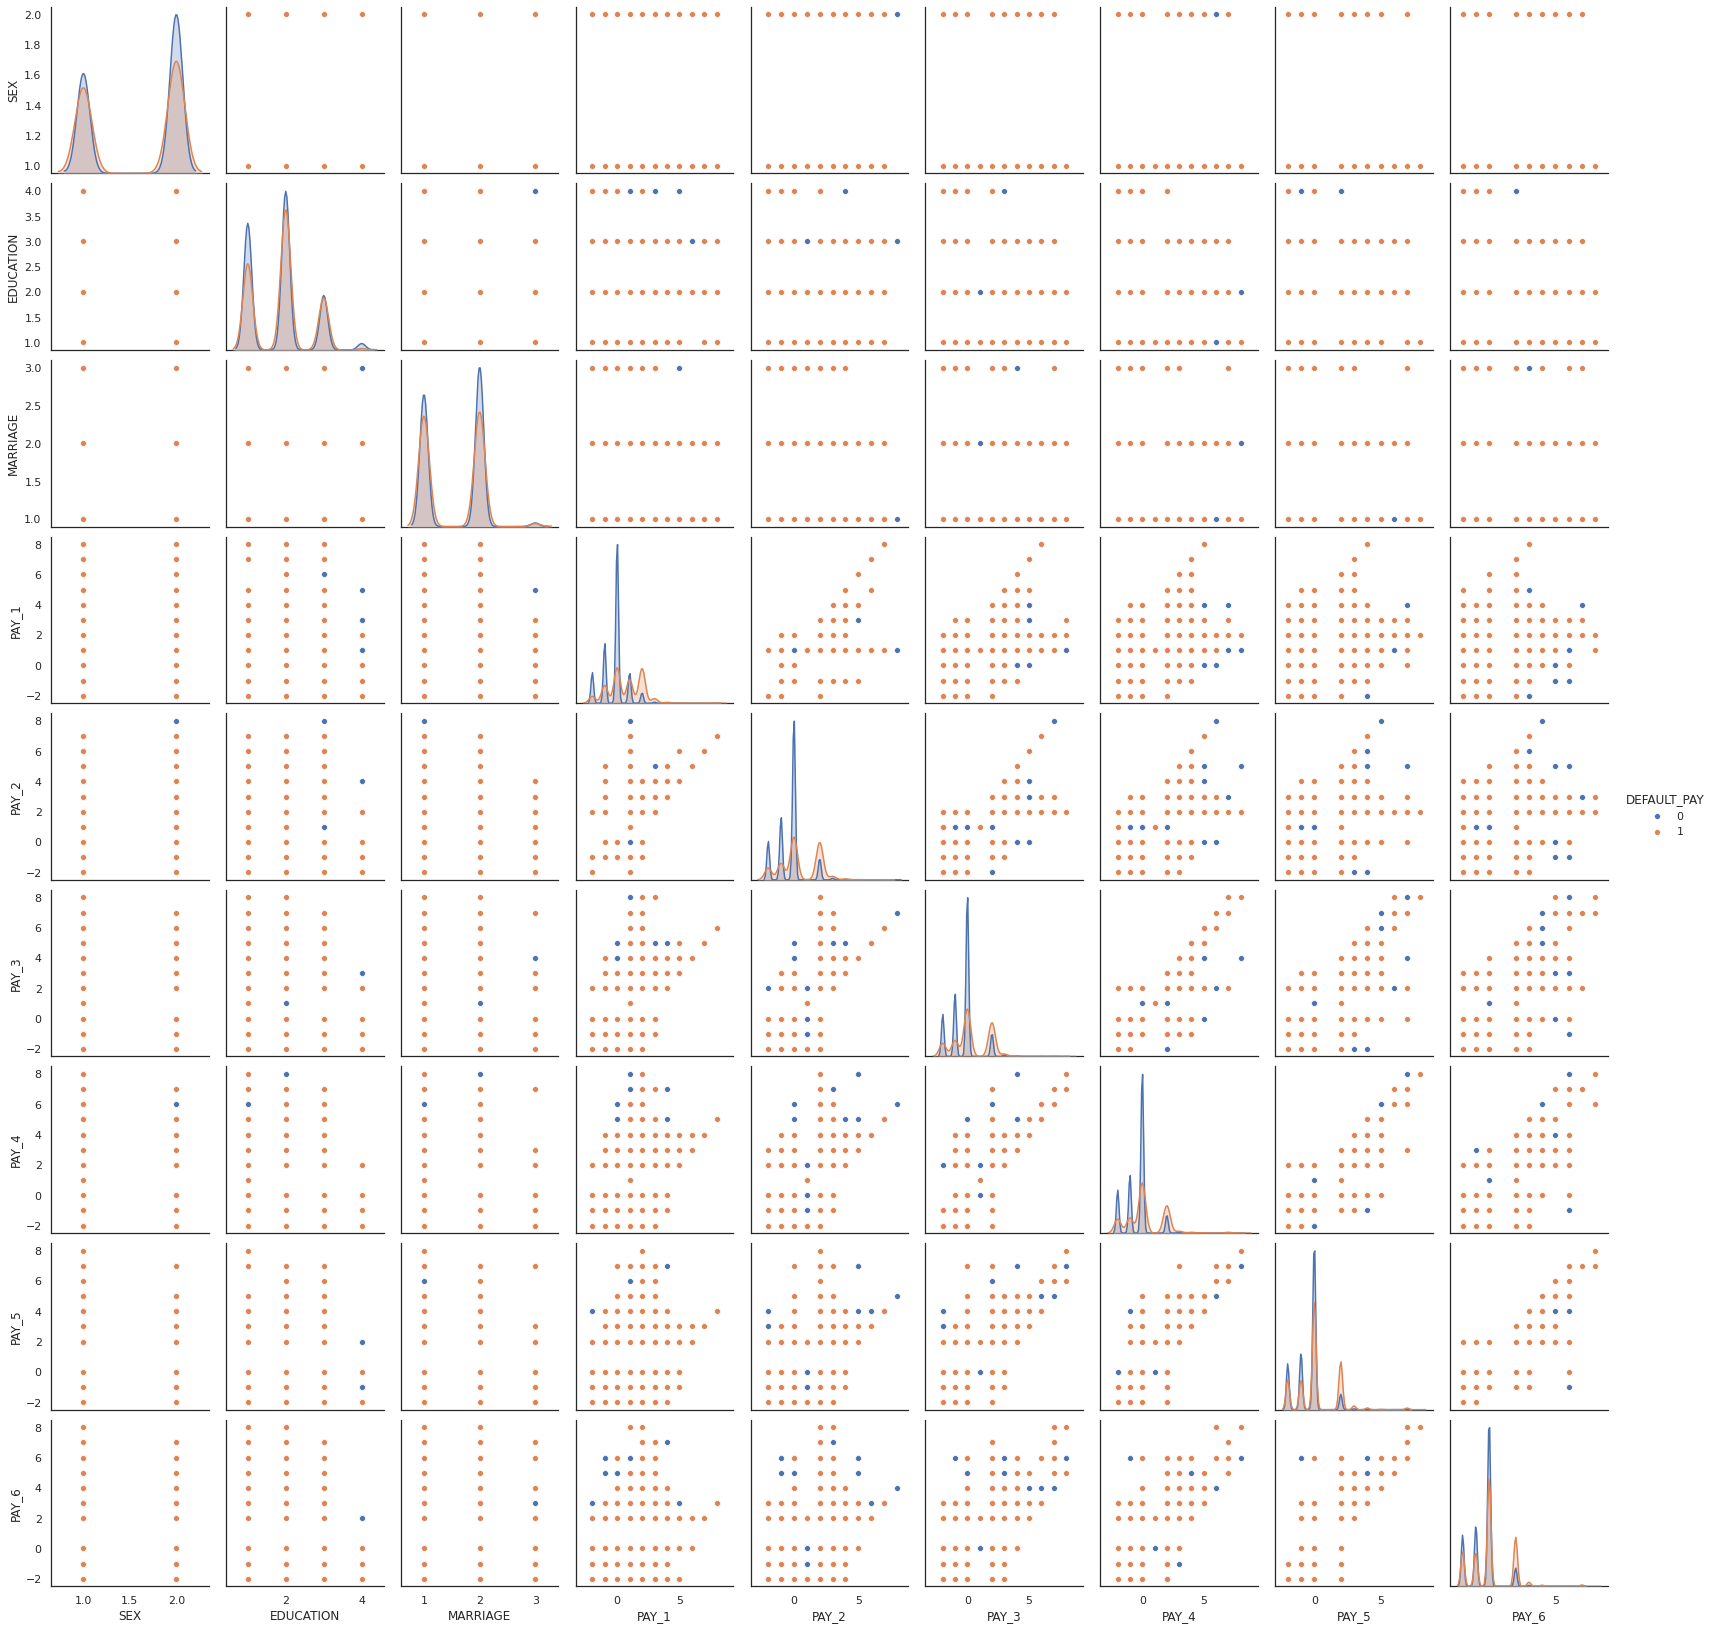

In [230]:
sns.pairplot(df_categorical, hue = 'DEFAULT_PAY')

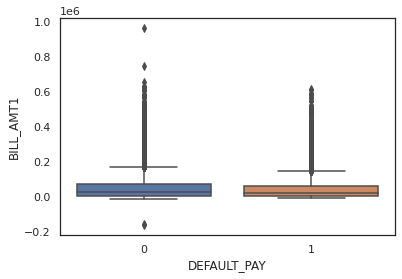

In [234]:
sns.boxplot(y='BILL_AMT1',x='DEFAULT_PAY',data=df)

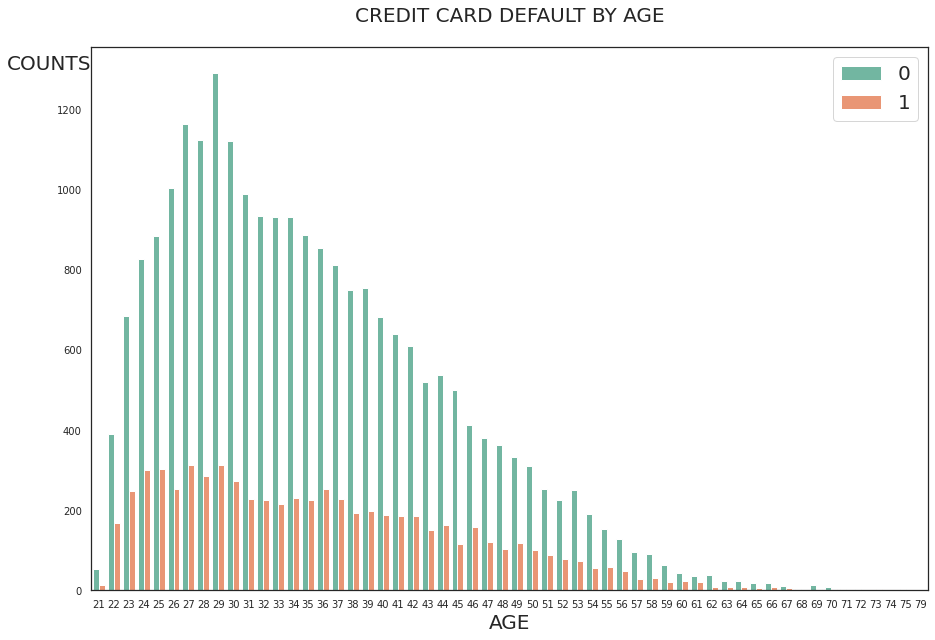

In [228]:
fig, axs = plt.subplots(figsize=(15,10))

axs = sns.countplot(x='AGE', hue='DEFAULT_PAY', data=df, palette='Set2')

plt.title('CREDIT CARD DEFAULT BY AGE', size=20, pad=25)

axs.set_ylabel('COUNTS', rotation=0, labelpad=40,size=20)
axs.set_xlabel('AGE', size=20)
axs.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axs.legend(loc='upper right',fontsize=20)


axs.tick_params(labelsize=10)  # Changes size of the values on the label

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


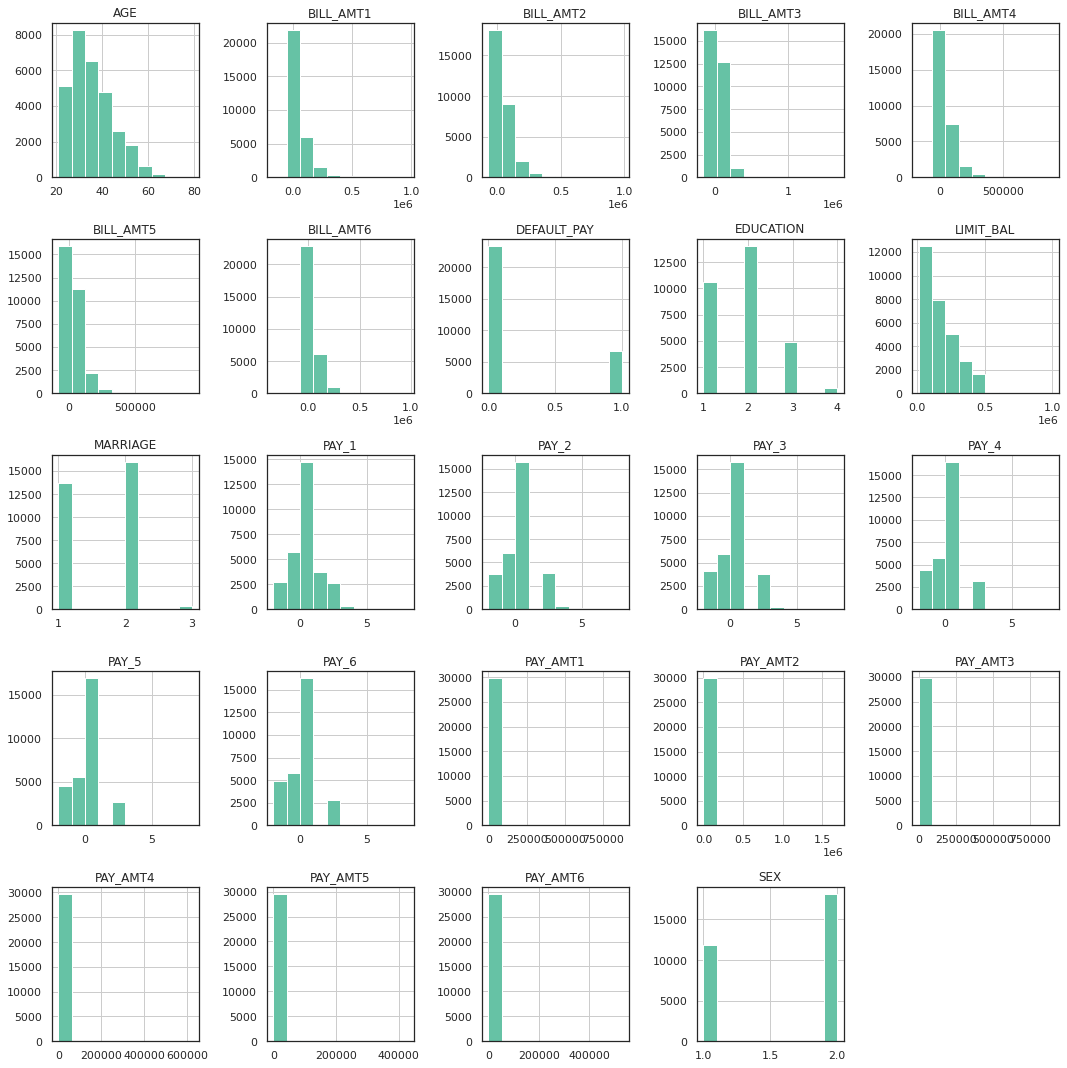

In [241]:
# Create a histogram for all variables

fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax,color='#66c2a5')
plt.tight_layout();

### Feature Selection

#### Correlation Matrix

We have our data ready, then I will plot correlation matrix to find the correlation within each feature and target feature also find if there are a multi colinearity in between each features.

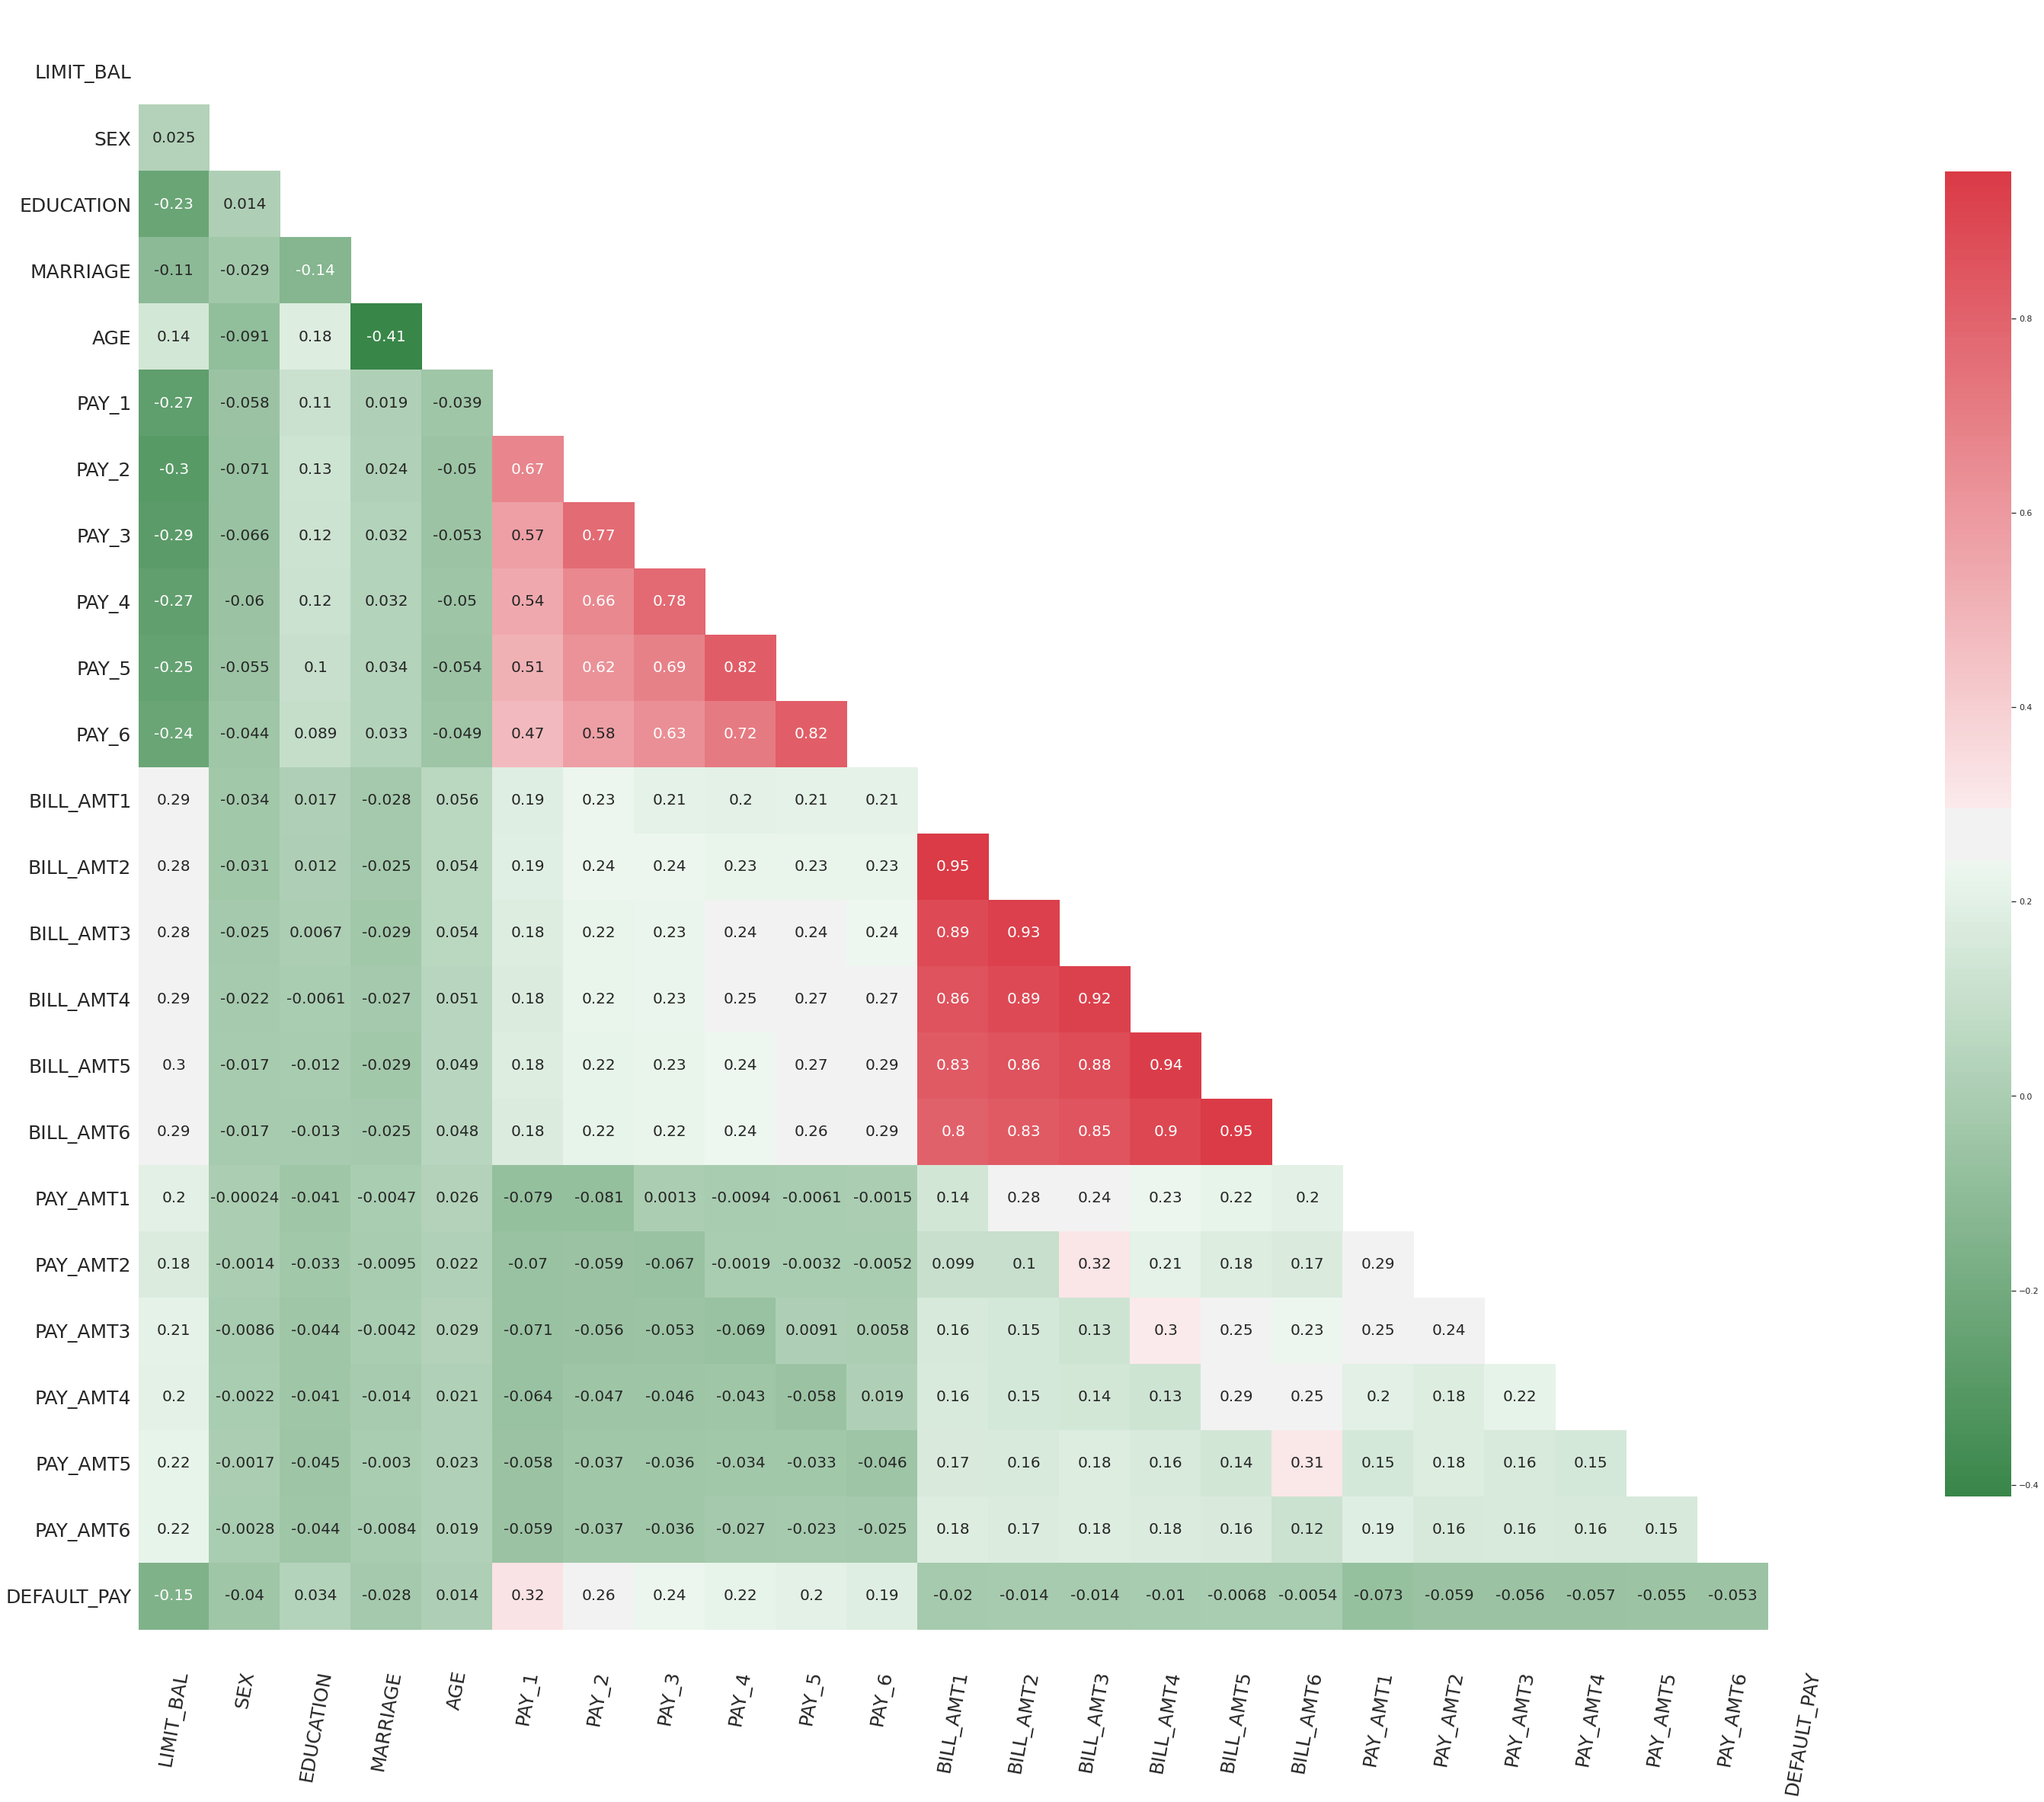

In [237]:
sns.set(style="white")
# Creating the data
data = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(50,40))

# Create a custom color palette
cmap = sns.diverging_palette(133, 10, as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Green = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax, 
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);

From above heatmap the darker the color means the higher the correlation. 

There are no highly correlated features with our target variables (DEFAULT_PAY). The highest positif correlation are PAY_1 followed by PAY_2, PAY_3. Then The higher negative corelation are LIMIT_BAL followed by PAY_AMT1 and PAY_AMT2.

We also able to identified that between PAY_1 to PAY_6 have a multi-colinearity. This also can be seen on BILL_AMT1 to BILL_AMT6 with even higher correlation. Later on we will take this condition into account.


#### Feature Importance

### Modelling Tehcniques

In this face, I will approached by creating a baseline model first. Then choose the best model to furhter improve the performances.

The best performances model will be selected from these algorithms:
- Logistic Regression
- K-Nearest Neighbor
- Naive Bayes Classifier
- Support Vector Machines (LinearSVC)
- Decision Trees
- Random Forest
- XGBoost
- LightGBM

To decide which model is better I will measure the values based on the F1 Score. So that I could see model performances both from Recall and Precision point of view.

#### Training, Validating, and Scoring Baseline Model



For the baseline model, I will create a model with two condition:
1. Create a model without scaling the features
2. Create a model with standardize the features

In [242]:
## Baseline model performance evaluation

# to give model baseline report with cross-validation in dataframe 
def baseline_report_cv_(model, X, y, n_splits, name):
    """
    Accepts a model object, X (independent variables), y (target), n_splits and name of the model
    and returns a model with various scoring metrics of each classifier model on a cross-validation split
    ----
    Input: model object, X, y, n_splits (integer), name (str)
    Output: Various metric scores of a model.
    """
    # Splitting the data into 80% training/validation data and 20% testing data
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

    # Splitting the training data into 60% training data and 20% validation data.
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=99)
     
    # Creating a shuffled kfold of 5
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=99) 
    
    accuracy     = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train_val, y_train_val,cv=cv, scoring='roc_auc'))
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc]})
    return df_model


# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

# to concat all models
df_models = pd.concat([baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_no_scale = df_models.drop('index', axis=1)
df_models_no_scale

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

,model,accuracy,precision,recall,f1score,rocauc
0,GaussianNB,0.365667,0.245305,0.901385,0.385615,0.678054
1,LogisticRegression,0.779083,0.200000,0.000182,0.000364,0.659797
2,KNN,0.754375,0.382908,0.183118,0.247733,0.612114
3,DecisionTree,0.729042,0.390307,0.422516,0.403149,0.618969
4,RandomForest,0.815750,0.640529,0.370136,0.471629,0.764621
5,LinearSVC,0.665042,0.275591,0.157726,0.292112,0.603623


In [ ]:
## Scaled Dataset Model performance evaluation

# to evaluate baseline models
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

# Scaling the inputs into model
# Separate data into X and Y components
X = df.iloc[:,:-1]  
y = df.iloc[:,-1:]

## Scale data (just scale everything lol)
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([baseline_report_cv_(gnb, X, y, 5, 'GaussianNB'),
                       baseline_report_cv_(logit, X, y, 5, 'LogisticRegression'),
                       baseline_report_cv_(knn, X, y, 5, 'KNN'),
                       baseline_report_cv_(decisiontree, X, y, 5, 'DecisionTree'),
                       baseline_report_cv_(randomforest, X, y, 5, 'RandomForest'),
                       baseline_report_cv_(linearsvc, X, y, 5, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale = df_models.drop('index', axis=1)
df_models_scale

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

### Modelling with Boosting Algorithm

In [137]:
# Set Parameter

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

In [153]:
# Define Target and Predictor
target = df.iloc[:,-1:].columns
predictors = df.iloc[:,1:-1].columns

print('Target Variable:\n {} \n'.format(target))
print('Predictor Variables:\n {}'.format(predictors))

Target Variable:
 Index(['DEFAULT_PAY'], dtype='object') 

Predictor Variables:
 Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')


In [154]:
# Split Data into train and validation set
train_df, val_df = train_test_split(df,
                                    test_size=VALID_SIZE,
                                    random_state=RANDOM_STATE,
                                    shuffle=True )

In [155]:
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)

In [156]:
clf.fit(train_df[predictors], train_df[target].values)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

In [157]:
preds = clf.predict(val_df[predictors])

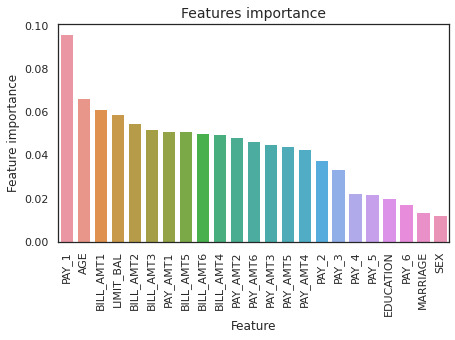

In [162]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

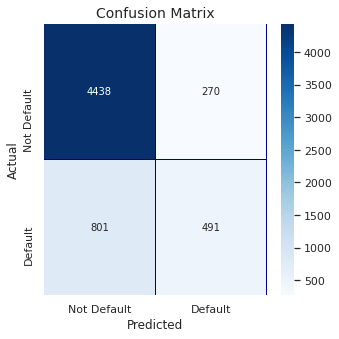

In [193]:
cm = pd.crosstab(val_df['DEFAULT_PAY'].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
sns.heatmap(cm, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues",
            fmt="d")
plt.title('Confusion Matrix', fontsize=14)
plt.show()


In [161]:
roc_auc_score(val_df[target].values, preds)

0.6613408834445551

In [199]:
# XG BOOST

# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(val_df[predictors], val_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [200]:
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.692283	valid-auc:0.697638
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 50 rounds.
[50]	train-auc:0.768764	valid-auc:0.764403
[100]	train-auc:0.777119	valid-auc:0.772372
[150]	train-auc:0.783403	valid-auc:0.777372
[200]	train-auc:0.786813	valid-auc:0.778616
[250]	train-auc:0.789884	valid-auc:0.780026
[300]	train-auc:0.792425	valid-auc:0.780504
[350]	train-auc:0.794692	valid-auc:0.781214
[400]	train-auc:0.796753	valid-auc:0.781699
[450]	train-auc:0.798678	valid-auc:0.781951
Stopping. Best iteration:
[417]	train-auc:0.797382	valid-auc:0.782054



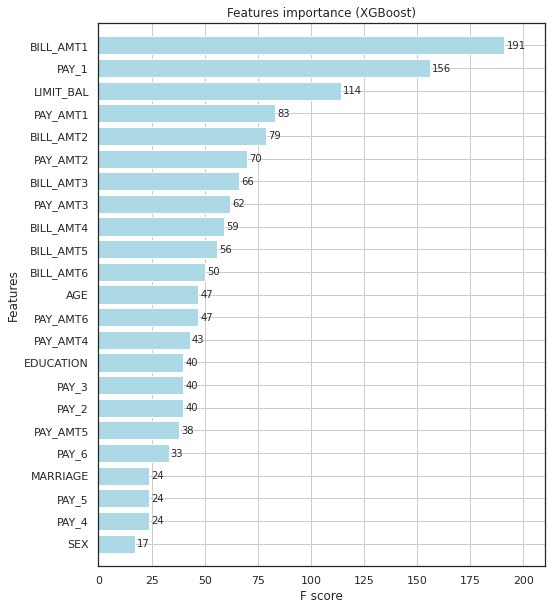

In [205]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,10))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="LightBlue") 
plt.show()

In [214]:
# LightGBM

params = {
          'boosting_type': 'gbdt',
          'objective': 'binary',
          'metric':'auc',
          'learning_rate': 0.05,
          'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
          'max_depth': 4,  # -1 means no limit
          'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
          'max_bin': 100,  # Number of bucketed bin for feature values
          'subsample': 0.9,  # Subsample ratio of the training instance.
          'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
          'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
          'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
          'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
          'nthread': 8,
          'verbose': 0,
          'scale_pos_weight':50, # because training data is sightly unbalanced 
         }

categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

dtrain = lgb.Dataset(train_df[predictors].values, 
                     label=train_df['DEFAULT_PAY'].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

dvalid = lgb.Dataset(val_df[predictors].values,
                     label=val_df['DEFAULT_PAY'].values,
                     feature_name=predictors,
                     categorical_feature=categorical_features)

In [215]:
evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets=[dtrain, dvalid], 
                  valid_names=['train','valid'], 
                  evals_result=evals_results, 
                  num_boost_round=MAX_ROUNDS,
                  early_stopping_rounds=EARLY_STOP,
                  verbose_eval=VERBOSE_EVAL, 
                  feval=None)

del dvalid
gc.collect()

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


ValueError: ignored